# cvPCA Analysis - Areas

## Import modules

In [2]:
from itertools import permutations
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## cvPCA Helper Functions

These functions will allow us to run a complete PCA analysis

In [3]:
def get_sample_cov_matrix(X):
    mean_vec = np.mean(X, axis=0)

    X_standard = (X - mean_vec)/np.std(X,axis = 0)

    cov_matrix = X_standard.T.dot(X_standard)/(X_standard.shape[0]-1)

    return cov_matrix

In [4]:
#This function sorts the eigenvalues into descending order so that it is possible to see the amount of variance explained by each principle component
def sort_evals_descending(evals, evectors):
    index = np.flip(np.argsort(evals))
    evals = evals[index]
    evectors = evectors[:, index]
    if evals.shape[0] == 2:
        if np.arccos(np.matmul(evectors[:, 0], 1 / np.sqrt(2) * np.array([1, 1]))) > np.pi / 2:
            evectors[:, 0] = -evectors[:, 0]
        if np.arccos(np.matmul(evectors[:, 1], 1 / np.sqrt(2) * np.array([-1, 1]))) > np.pi / 2:
            evectors[:, 1] = -evectors[:, 1]
    return evals, evectors

In [5]:
def pca(X):
    
    X = X[::2]
  # Calculate the sample covariance matrix

    cov_matrix = get_sample_cov_matrix(X)

  # Calculate the eigenvalues and eigenvectors
    evals, evectors = np.linalg.eigh(cov_matrix)

  # Sort the eigenvalues in descending order
    evals, evectors = sort_evals_descending(evals, evectors)

    return evectors, evals


In [6]:
def cvpca(X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,start = 0,end = 90):
    trial_perms = list(permutations(['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10'], 2))
    matrix_dict = {'X1':X1,'X2':X2,'X3':X3,'X4':X4,'X5':X5,'X6':X6,'X7':X7,'X8':X8,'X9':X9,'X10':X10}
    evalues_list = []
    for i in range(start,end):
        X_train = matrix_dict[trial_perms[i][0]]
        X_test = matrix_dict[trial_perms[i][1]]

        mean_vec_train = np.mean(X_train, axis=0)
        X_train_standard = (X_train - mean_vec_train)/np.std(X_train,axis = 0)

        X_test_standard = (X_test - mean_vec_train)/np.std(X_train,axis = 0)

        evalues_train, evectors_train = np.linalg.eigh(X_train_standard.T.dot(X_train_standard)/(X_train_standard.shape[0]-1))
        evalues_train, evectors_train = sort_evals_descending(evalues_train, evectors_train)

        evalues_cvpca = np.diag(np.dot(np.dot(evectors_train.T, np.dot(X_test_standard.T, X_train_standard)), evectors_train)/(X_train_standard.shape[0]-1))
        evalues_list.append(evalues_cvpca)

        
    return evalues_list

In [7]:
#This function plots the eigenspectrum (descending order of eigenvalues) of the layer resulting in a downward sloping graph
#Represented with a log-log scale
def plot_eigenspectrum(evals):
    plt.figure()
    plt.plot(np.arange(1, len(evals) + 1), evals,
             '--k')
    plt.xlabel('PC Components')
    plt.ylabel('Variance')
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

In [8]:
#Normalized
def plot_eigenspectrum_combined(evals_v1,evals_lm,evals_al,evals_rl):
    plt.figure()
    x=np.linspace(1,400,400)
    y=f(x)
    plt.plot(x, y,color = 'black', label = '1/n Decay')
    plt.plot(np.arange(1, len(evals_v1) + 1), evals_v1/np.sum(evals_v1), label = 'Area V1')
    plt.plot(np.arange(1, len(evals_lm) + 1), evals_lm/np.sum(evals_lm), label = 'Area LM')
    plt.plot(np.arange(1, len(evals_al) + 1), evals_al/np.sum(evals_al), label = 'Area AL')
    plt.plot(np.arange(1, len(evals_rl) + 1), evals_rl/np.sum(evals_rl), label = 'Area RL')
    plt.xlabel('PC Components')
    plt.ylabel('Variance')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.show()

In [9]:
#Reference decay rate for graphs
def f(x):
    return 1/x

## Area V1 Analysis

### Define data frames for each trial in Area V1

In [10]:
V1_Trial1_Oracle = pd.read_csv("C:/Users/riley/data/Areas/V1_Trial1_Oracle.csv", header= None)
V1_Trial1_Oracle = V1_Trial1_Oracle.to_numpy()
V1_Trial1_Oracle = np.transpose(V1_Trial1_Oracle)

In [11]:
V1_Trial2_Oracle = pd.read_csv("C:/Users/riley/data/Areas/V1_Trial2_Oracle.csv", header= None)
V1_Trial2_Oracle = V1_Trial2_Oracle.to_numpy()
V1_Trial2_Oracle = np.transpose(V1_Trial2_Oracle)

In [12]:
V1_Trial3_Oracle = pd.read_csv("C:/Users/riley/data/Areas/V1_Trial3_Oracle.csv", header= None)
V1_Trial3_Oracle = V1_Trial3_Oracle.to_numpy()
V1_Trial3_Oracle = np.transpose(V1_Trial3_Oracle)

In [13]:
V1_Trial4_Oracle = pd.read_csv("C:/Users/riley/data/Areas/V1_Trial4_Oracle.csv", header= None)
V1_Trial4_Oracle = V1_Trial4_Oracle.to_numpy()
V1_Trial4_Oracle = np.transpose(V1_Trial4_Oracle)

In [14]:
V1_Trial5_Oracle = pd.read_csv("C:/Users/riley/data/Areas/V1_Trial5_Oracle.csv", header= None)
V1_Trial5_Oracle = V1_Trial5_Oracle.to_numpy()
V1_Trial5_Oracle = np.transpose(V1_Trial5_Oracle)

In [15]:
V1_Trial6_Oracle = pd.read_csv("C:/Users/riley/data/Areas/V1_Trial6_Oracle.csv", header= None)
V1_Trial6_Oracle = V1_Trial6_Oracle.to_numpy()
V1_Trial6_Oracle = np.transpose(V1_Trial6_Oracle)

In [16]:
V1_Trial7_Oracle = pd.read_csv("C:/Users/riley/data/Areas/V1_Trial7_Oracle.csv", header= None)
V1_Trial7_Oracle = V1_Trial7_Oracle.to_numpy()
V1_Trial7_Oracle = np.transpose(V1_Trial7_Oracle)

In [17]:
V1_Trial8_Oracle = pd.read_csv("C:/Users/riley/data/Areas/V1_Trial8_Oracle.csv", header= None)
V1_Trial8_Oracle = V1_Trial8_Oracle.to_numpy()
V1_Trial8_Oracle = np.transpose(V1_Trial8_Oracle)

In [18]:
V1_Trial9_Oracle = pd.read_csv("C:/Users/riley/data/Areas/V1_Trial9_Oracle.csv", header= None)
V1_Trial9_Oracle = V1_Trial9_Oracle.to_numpy()
V1_Trial9_Oracle = np.transpose(V1_Trial9_Oracle)

In [19]:
V1_Trial10_Oracle = pd.read_csv("C:/Users/riley/data/Areas/V1_Trial10_Oracle.csv", header= None)
V1_Trial10_Oracle = V1_Trial10_Oracle.to_numpy()
V1_Trial10_Oracle = np.transpose(V1_Trial10_Oracle)

In [20]:
V1_AvgResp_Oracle = pd.read_csv("C:/Users/riley/data/Areas/V1_AvgResp_Oracle.csv", header= None)
V1_AvgResp_Oracle = V1_AvgResp_Oracle.to_numpy()
V1_AvgResp_Oracle = np.transpose(V1_AvgResp_Oracle)

### Run cvPCA function on train/test combinations and average into final eigenspectrum

In [ ]:
cvPCA_areav1_espectra1 = cvpca(V1_Trial1_Oracle,V1_Trial2_Oracle,V1_Trial3_Oracle,V1_Trial4_Oracle,V1_Trial5_Oracle,V1_Trial6_Oracle,V1_Trial7_Oracle,V1_Trial8_Oracle,V1_Trial9_Oracle,V1_Trial10_Oracle,0,30)
cvPCA_areav1_espectra1 = np.array(cvPCA_areav1_espectra1)
cvPCA_areav1_espectrum1 = cvPCA_areav1_espectra1.mean(axis=0)

In [ ]:
cvPCA_areav1_espectra2 = cvpca(V1_Trial1_Oracle,V1_Trial2_Oracle,V1_Trial3_Oracle,V1_Trial4_Oracle,V1_Trial5_Oracle,V1_Trial6_Oracle,V1_Trial7_Oracle,V1_Trial8_Oracle,V1_Trial9_Oracle,V1_Trial10_Oracle,30,60)
cvPCA_areav1_espectra2 = np.array(cvPCA_areav1_espectra2)
cvPCA_areav1_espectrum2 = cvPCA_areav1_espectra2.mean(axis=0)

In [ ]:
cvPCA_areav1_espectra3 = cvpca(V1_Trial1_Oracle,V1_Trial2_Oracle,V1_Trial3_Oracle,V1_Trial4_Oracle,V1_Trial5_Oracle,V1_Trial6_Oracle,V1_Trial7_Oracle,V1_Trial8_Oracle,V1_Trial9_Oracle,V1_Trial10_Oracle,60,90)
cvPCA_areav1_espectra3 = np.array(cvPCA_areav1_espectra3)
cvPCA_areav1_espectrum3 = cvPCA_areav1_espectra3.mean(axis=0)

In [ ]:
cvPCA_areav1_espectrum = (cvPCA_areav1_espectrum1+cvPCA_areav1_espectrum2+cvPCA_areav1_espectrum3)/3

In [ ]:
np.savetxt('cvPCA_areav1_espectrum.csv', cvPCA_areav1_espectrum, delimiter = ',')

### Run standard PCA to compare results

In [ ]:
areav1_evectors, areav1_espectrum = pca(V1_AvgResp_Oracle)

In [ ]:
np.savetxt('areav1_espectrum.csv', areav1_espectrum, delimiter = ',')

In [ ]:
x=np.linspace(1,400,400)
y=f(x)
plt.figure()
plt.plot(x, y,color = 'black', label = '1/n Decay')
plt.plot(np.arange(1, len(cvPCA_areav1_espectrum) + 1),cvPCA_areav1_espectrum/np.sum(cvPCA_areav1_espectrum), label = 'cvPCA Oracle')
plt.plot(np.arange(1, len(areav1_espectrum) + 1),areav1_espectrum/np.sum(areav1_espectrum), label = 'Standard PCA')
plt.xlabel('PC Components')
plt.ylabel('Variance')
plt.xscale('log')
plt.xlim(1,500)
plt.ylim(10e-5,1)
plt.yscale('log')
plt.legend()
plt.show()

## Area AL Analysis

### Define data frames for each trial in area AL

In [ ]:
AL_Trial1_Oracle = pd.read_csv("C:/Users/riley/data/Areas/AL_Trial1_Oracle.csv", header= None)
AL_Trial1_Oracle = AL_Trial1_Oracle.to_numpy()
AL_Trial1_Oracle = np.transpose(AL_Trial1_Oracle)

In [ ]:
AL_Trial2_Oracle = pd.read_csv("C:/Users/riley/data/Areas/AL_Trial2_Oracle.csv", header= None)
AL_Trial2_Oracle = AL_Trial2_Oracle.to_numpy()
AL_Trial2_Oracle = np.transpose(AL_Trial2_Oracle)

In [ ]:
AL_Trial3_Oracle = pd.read_csv("C:/Users/riley/data/Areas/AL_Trial3_Oracle.csv", header= None)
AL_Trial3_Oracle = AL_Trial3_Oracle.to_numpy()
AL_Trial3_Oracle = np.transpose(AL_Trial3_Oracle)

In [ ]:
AL_Trial4_Oracle = pd.read_csv("C:/Users/riley/data/Areas/AL_Trial4_Oracle.csv", header= None)
AL_Trial4_Oracle = AL_Trial4_Oracle.to_numpy()
AL_Trial4_Oracle = np.transpose(AL_Trial4_Oracle)

In [ ]:
AL_Trial5_Oracle = pd.read_csv("C:/Users/riley/data/Areas/AL_Trial5_Oracle.csv", header= None)
AL_Trial5_Oracle = AL_Trial5_Oracle.to_numpy()
AL_Trial5_Oracle = np.transpose(AL_Trial5_Oracle)

In [ ]:
AL_Trial6_Oracle = pd.read_csv("C:/Users/riley/data/Areas/AL_Trial6_Oracle.csv", header= None)
AL_Trial6_Oracle = AL_Trial6_Oracle.to_numpy()
AL_Trial6_Oracle = np.transpose(AL_Trial6_Oracle)

In [ ]:
AL_Trial7_Oracle = pd.read_csv("C:/Users/riley/data/Areas/AL_Trial7_Oracle.csv", header= None)
AL_Trial7_Oracle = AL_Trial7_Oracle.to_numpy()
AL_Trial7_Oracle = np.transpose(AL_Trial7_Oracle)

In [ ]:
AL_Trial8_Oracle = pd.read_csv("C:/Users/riley/data/Areas/AL_Trial8_Oracle.csv", header= None)
AL_Trial8_Oracle = AL_Trial8_Oracle.to_numpy()
AL_Trial8_Oracle = np.transpose(AL_Trial8_Oracle)

In [ ]:
AL_Trial9_Oracle = pd.read_csv("C:/Users/riley/data/Areas/AL_Trial9_Oracle.csv", header= None)
AL_Trial9_Oracle = AL_Trial9_Oracle.to_numpy()
AL_Trial9_Oracle = np.transpose(AL_Trial9_Oracle)

In [ ]:
AL_Trial10_Oracle = pd.read_csv("C:/Users/riley/data/Areas/AL_Trial10_Oracle.csv", header= None)
AL_Trial10_Oracle = AL_Trial10_Oracle.to_numpy()
AL_Trial10_Oracle = np.transpose(AL_Trial10_Oracle)

In [ ]:
AL_AvgResp_Oracle = pd.read_csv("C:/Users/riley/data/Areas/AL_AvgResp_Oracle.csv", header= None)
AL_AvgResp_Oracle = AL_AvgResp_Oracle.to_numpy()
AL_AvgResp_Oracle = np.transpose(AL_AvgResp_Oracle)

### Run cvPCA function on train/test combinations and average into final eigenspectrum

In [ ]:
cvPCA_areaal_espectra = cvpca(AL_Trial1_Oracle,AL_Trial2_Oracle,AL_Trial3_Oracle,AL_Trial4_Oracle,AL_Trial5_Oracle,AL_Trial6_Oracle,AL_Trial7_Oracle,AL_Trial8_Oracle,AL_Trial9_Oracle,AL_Trial10_Oracle)
cvPCA_areaal_espectra = np.array(cvPCA_areaal_espectra)
cvPCA_areaal_espectrum = cvPCA_areaal_espectra.mean(axis=0)

In [ ]:
np.savetxt('cvPCA_areaal_espectrum.csv', cvPCA_areaal_espectrum, delimiter = ',')

### Run standard PCA to compare results

In [ ]:
areaal_evectors, areaal_espectrum = pca(AL_AvgResp_Oracle)

In [ ]:
np.savetxt('areaal_espectrum.csv', areaal_espectrum, delimiter = ',')

In [ ]:
x=np.linspace(1,400,400)
y=f(x)
plt.figure()
plt.plot(x, y,color = 'black', label = '1/n Decay')
plt.plot(np.arange(1, len(cvPCA_areaal_espectrum) + 1),cvPCA_areaal_espectrum/np.sum(cvPCA_areaal_espectrum), label = 'cvPCA Oracle')
plt.plot(np.arange(1, len(areaal_espectrum) + 1),areaal_espectrum/np.sum(areaal_espectrum), label = 'Standard PCA')
plt.xlabel('PC Components')
plt.ylabel('Variance')
plt.xscale('log')
plt.xlim(1,500)
plt.ylim(10e-5,1)
plt.yscale('log')
plt.legend()
plt.show()

## Area RL Analysis

### Define data frames for each trial in area RL

In [ ]:
RL_Trial1_Oracle = pd.read_csv("C:/Users/riley/data/Areas/RL_Trial1_Oracle.csv", header= None)
RL_Trial1_Oracle = RL_Trial1_Oracle.to_numpy()
RL_Trial1_Oracle = np.transpose(RL_Trial1_Oracle)

In [ ]:
RL_Trial2_Oracle = pd.read_csv("C:/Users/riley/data/Areas/RL_Trial2_Oracle.csv", header= None)
RL_Trial2_Oracle = RL_Trial2_Oracle.to_numpy()
RL_Trial2_Oracle = np.transpose(RL_Trial2_Oracle)

In [ ]:
RL_Trial3_Oracle = pd.read_csv("C:/Users/riley/data/Areas/RL_Trial3_Oracle.csv", header= None)
RL_Trial3_Oracle = RL_Trial3_Oracle.to_numpy()
RL_Trial3_Oracle = np.transpose(RL_Trial3_Oracle)

In [ ]:
RL_Trial4_Oracle = pd.read_csv("C:/Users/riley/data/Areas/RL_Trial4_Oracle.csv", header= None)
RL_Trial4_Oracle = RL_Trial4_Oracle.to_numpy()
RL_Trial4_Oracle = np.transpose(RL_Trial4_Oracle)

In [ ]:
RL_Trial5_Oracle = pd.read_csv("C:/Users/riley/data/Areas/RL_Trial5_Oracle.csv", header= None)
RL_Trial5_Oracle = RL_Trial5_Oracle.to_numpy()
RL_Trial5_Oracle = np.transpose(RL_Trial5_Oracle)

In [ ]:
RL_Trial6_Oracle = pd.read_csv("C:/Users/riley/data/Areas/RL_Trial6_Oracle.csv", header= None)
RL_Trial6_Oracle = RL_Trial6_Oracle.to_numpy()
RL_Trial6_Oracle = np.transpose(RL_Trial6_Oracle)

In [ ]:
RL_Trial7_Oracle = pd.read_csv("C:/Users/riley/data/Areas/RL_Trial7_Oracle.csv", header= None)
RL_Trial7_Oracle = RL_Trial7_Oracle.to_numpy()
RL_Trial7_Oracle = np.transpose(RL_Trial7_Oracle)

In [ ]:
RL_Trial8_Oracle = pd.read_csv("C:/Users/riley/data/Areas/RL_Trial8_Oracle.csv", header= None)
RL_Trial8_Oracle = RL_Trial8_Oracle.to_numpy()
RL_Trial8_Oracle = np.transpose(RL_Trial8_Oracle)

In [ ]:
RL_Trial9_Oracle = pd.read_csv("C:/Users/riley/data/Areas/RL_Trial9_Oracle.csv", header= None)
RL_Trial9_Oracle = RL_Trial9_Oracle.to_numpy()
RL_Trial9_Oracle = np.transpose(RL_Trial9_Oracle)

In [ ]:
RL_Trial10_Oracle = pd.read_csv("C:/Users/riley/data/Areas/RL_Trial10_Oracle.csv", header= None)
RL_Trial10_Oracle = RL_Trial10_Oracle.to_numpy()
RL_Trial10_Oracle = np.transpose(RL_Trial10_Oracle)

In [ ]:
RL_AvgResp_Oracle = pd.read_csv("C:/Users/riley/data/Areas/RL_AvgResp_Oracle.csv", header= None)
RL_AvgResp_Oracle = RL_AvgResp_Oracle.to_numpy()
RL_AvgResp_Oracle = np.transpose(RL_AvgResp_Oracle)

### Run cvPCA function on train/test combinations and average into final eigenspectrum

In [ ]:
cvPCA_arearl_espectra1 = cvpca(RL_Trial1_Oracle,RL_Trial2_Oracle,RL_Trial3_Oracle,RL_Trial4_Oracle,RL_Trial5_Oracle,RL_Trial6_Oracle,RL_Trial7_Oracle,RL_Trial8_Oracle,RL_Trial9_Oracle,RL_Trial10_Oracle,0,45)
cvPCA_arearl_espectra1 = np.array(cvPCA_arearl_espectra1)
cvPCA_arearl_espectrum1 = cvPCA_arearl_espectra1.mean(axis=0)

In [ ]:
cvPCA_arearl_espectra2 = cvpca(RL_Trial1_Oracle,RL_Trial2_Oracle,RL_Trial3_Oracle,RL_Trial4_Oracle,RL_Trial5_Oracle,RL_Trial6_Oracle,RL_Trial7_Oracle,RL_Trial8_Oracle,RL_Trial9_Oracle,RL_Trial10_Oracle,45,90)
cvPCA_arearl_espectra2 = np.array(cvPCA_arearl_espectra2)
cvPCA_arearl_espectrum2 = cvPCA_arearl_espectra2.mean(axis=0)

In [ ]:
cvPCA_arearl_espectrum = (cvPCA_arearl_espectrum1+cvPCA_arearl_espectrum2)/2

In [ ]:
np.savetxt('cvPCA_arearl_espectrum.csv', cvPCA_arearl_espectrum, delimiter = ',')

### Run standard PCA to compare results

In [ ]:
arearl_evectors, arearl_espectrum = pca(RL_AvgResp_Oracle)

In [ ]:
np.savetxt('arearl_espectrum.csv', arearl_espectrum, delimiter = ',')

In [ ]:
x=np.linspace(1,400,400)
y=f(x)
plt.figure()
plt.plot(x, y,color = 'black', label = '1/n Decay')
plt.plot(np.arange(1, len(cvPCA_arearl_espectrum) + 1),cvPCA_arearl_espectrum/np.sum(cvPCA_arearl_espectrum), label = 'cvPCA')
plt.plot(np.arange(1, len(arearl_espectrum) + 1),arearl_espectrum/np.sum(arearl_espectrum), label = 'PCA')
plt.xlabel('PC Components')
plt.ylabel('Variance')
plt.xscale('log')
plt.xlim(1,300)
plt.ylim(10e-4,1)
plt.yscale('log')
plt.legend()
plt.show()

## Area LM Analysis

### Define data frames for each trial in area LM

In [ ]:
LM_Trial1_Oracle = pd.read_csv("C:/Users/riley/data/Areas/LM_Trial1_Oracle.csv", header= None)
LM_Trial1_Oracle = LM_Trial1_Oracle.to_numpy()
LM_Trial1_Oracle = np.transpose(LM_Trial1_Oracle)

In [ ]:
LM_Trial2_Oracle = pd.read_csv("C:/Users/riley/data/Areas/LM_Trial2_Oracle.csv", header= None)
LM_Trial2_Oracle = LM_Trial2_Oracle.to_numpy()
LM_Trial2_Oracle = np.transpose(LM_Trial2_Oracle)

In [ ]:
LM_Trial3_Oracle = pd.read_csv("C:/Users/riley/data/Areas/LM_Trial3_Oracle.csv", header= None)
LM_Trial3_Oracle = LM_Trial3_Oracle.to_numpy()
LM_Trial3_Oracle = np.transpose(LM_Trial3_Oracle)

In [ ]:
LM_Trial4_Oracle = pd.read_csv("C:/Users/riley/data/Areas/LM_Trial4_Oracle.csv", header= None)
LM_Trial4_Oracle = LM_Trial4_Oracle.to_numpy()
LM_Trial4_Oracle = np.transpose(LM_Trial4_Oracle)

In [ ]:
LM_Trial5_Oracle = pd.read_csv("C:/Users/riley/data/Areas/LM_Trial5_Oracle.csv", header= None)
LM_Trial5_Oracle = LM_Trial5_Oracle.to_numpy()
LM_Trial5_Oracle = np.transpose(LM_Trial5_Oracle)

In [ ]:
LM_Trial6_Oracle = pd.read_csv("C:/Users/riley/data/Areas/LM_Trial6_Oracle.csv", header= None)
LM_Trial6_Oracle = LM_Trial6_Oracle.to_numpy()
LM_Trial6_Oracle = np.transpose(LM_Trial6_Oracle)

In [ ]:
LM_Trial7_Oracle = pd.read_csv("C:/Users/riley/data/Areas/LM_Trial7_Oracle.csv", header= None)
LM_Trial7_Oracle = LM_Trial7_Oracle.to_numpy()
LM_Trial7_Oracle = np.transpose(LM_Trial7_Oracle)

In [ ]:
LM_Trial8_Oracle = pd.read_csv("C:/Users/riley/data/Areas/LM_Trial8_Oracle.csv", header= None)
LM_Trial8_Oracle = LM_Trial8_Oracle.to_numpy()
LM_Trial8_Oracle = np.transpose(LM_Trial8_Oracle)

In [ ]:
LM_Trial9_Oracle = pd.read_csv("C:/Users/riley/data/Areas/LM_Trial9_Oracle.csv", header= None)
LM_Trial9_Oracle = LM_Trial9_Oracle.to_numpy()
LM_Trial9_Oracle = np.transpose(LM_Trial9_Oracle)

In [ ]:
LM_Trial10_Oracle = pd.read_csv("C:/Users/riley/data/Areas/LM_Trial10_Oracle.csv", header= None)
LM_Trial10_Oracle = LM_Trial10_Oracle.to_numpy()
LM_Trial10_Oracle = np.transpose(LM_Trial10_Oracle)

In [ ]:
LM_AvgResp_Oracle = pd.read_csv("C:/Users/riley/data/Areas/LM_AvgResp_Oracle.csv", header= None)
LM_AvgResp_Oracle = LM_AvgResp_Oracle.to_numpy()
LM_AvgResp_Oracle = np.transpose(LM_AvgResp_Oracle)

### Run cvPCA function on train/test combinations and average into final eigenspectrum

In [ ]:
cvPCA_arealm_espectra = cvpca(LM_Trial1_Oracle,LM_Trial2_Oracle,LM_Trial3_Oracle,LM_Trial4_Oracle,LM_Trial5_Oracle,LM_Trial6_Oracle,LM_Trial7_Oracle,LM_Trial8_Oracle,LM_Trial9_Oracle,LM_Trial10_Oracle)
cvPCA_arealm_espectra = np.array(cvPCA_arealm_espectra)
cvPCA_arealm_espectrum = cvPCA_arealm_espectra.mean(axis=0)

In [ ]:
np.savetxt('cvPCA_arealm_espectrum.csv', cvPCA_arealm_espectrum, delimiter = ',')

### Run standard PCA to compare results

In [ ]:
arealm_evectors, arealm_espectrum = pca(LM_AvgResp_Oracle)

In [ ]:
np.savetxt('arealm_espectrum.csv', arealm_espectrum, delimiter = ',')

In [ ]:
x=np.linspace(1,400,400)
y=f(x)
plt.figure()
plt.plot(x, y,color = 'black', label = '1/n Decay')
plt.plot(np.arange(1, len(cvPCA_arealm_espectrum) + 1),cvPCA_arealm_espectrum/np.sum(cvPCA_arealm_espectrum), label = 'cvPCA')
plt.plot(np.arange(1, len(arealm_espectrum) + 1),arealm_espectrum/np.sum(arealm_espectrum), label = 'PCA')
plt.xlabel('PC Components')
plt.ylabel('Variance')
plt.xscale('log')
plt.xlim(1,300)
plt.ylim(10e-4,1)
plt.yscale('log')
plt.legend()
plt.show()

## Plot combined eigenspectra to compare differences across layers

### cvPCA

In [ ]:
plot_eigenspectrum_combined_areas(cvPCA_areav1_espectrum,cvPCA_arealm_espectrum,cvPCA_areaal_espectrum,cvPCA_arearl_espectrum)

## Standard PCA

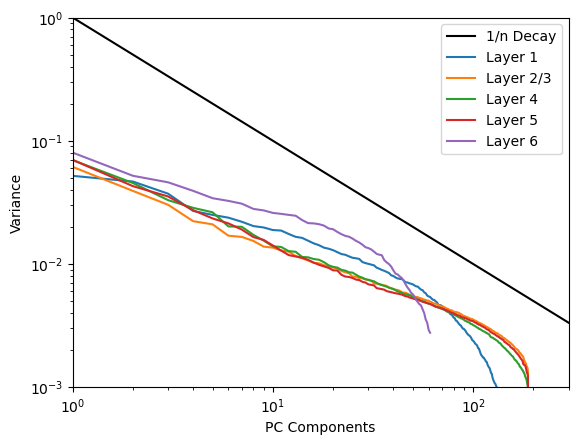

In [106]:
plot_eigenspectrum_combined_areas(areav1_espectrum,arealm_espectrum,areaal_espectrum,arearl_espectrum)